# Amazon Fine Food Reviews

<h3>Context :</h3>
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<h3>Content :</h3>
Reviews.csv: Pulled from the corresponding SQLite table named Reviews in database.sqlite
database.sqlite: Contains the table 'Reviews'

<h3>Data includes: </h3>

Reviews from Oct 1999 - Oct 2012<br>
568,454 reviews<br>
256,059 users<br>
74,258 products<br>
260 users with > 50 reviews

In [1]:
import pandas as pd
import nltk

am = pd.read_csv('amazonreviews.tsv', sep='\t')

am.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
am['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [5]:
am.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [6]:
am.shape

(10000, 2)

In [7]:
am.replace({'pos': 1, 'neg':0}, inplace=True)

In [10]:
am['review'] = am['review'].str.lower()
am.head()

,label,review
0,1,stuning even for the non-gamer: this sound tra...
1,1,the best soundtrack ever to anything.: i'm rea...
2,1,amazing!: this soundtrack is my favorite music...
3,1,excellent soundtrack: i truly like this soundt...
4,1,"remember, pull your jaw off the floor after he..."


In [1]:
from nltk.corpus import stopwords

stopwords.words('english')
len(stopwords.words('english'))

179

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char  not   in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer = text_process).fit(am["review"])

In [17]:
# bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [19]:
len(bow_transformer.vocabulary_)

40040

In [20]:
type(bow_transformer)

sklearn.feature_extraction.text.CountVectorizer

In [22]:
am_bow = bow_transformer.transform(am.review) # here the words are turned to vectorizer

In [23]:
am_bow # sparse martrix is one inwhcih there are lot of 0 n with high dimension

<10000x40040 sparse matrix of type '<class 'numpy.int64'>'
	with 359393 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(am_bow, am['label'])

In [37]:
print(x_train.shape)
print(y_train.shape)

(7500, 40040)
(7500,)


In [38]:
print(x_test.shape)
print(y_test.shape)

(2500, 40040)
(2500,)


In [ ]:
# Model using Naive Bayes Algo

In [39]:
from sklearn.naive_bayes import MultinomialNB

nb_am = MultinomialNB()

In [40]:
nb_am.fit(x_train, y_train)

MultinomialNB()

In [42]:
am_pred = nb_am.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score

tab1 = confusion_matrix(y_test, am_pred)
print(tab1)
nb_acc = accuracy_score(y_test, am_pred)
print('Accuracy : ', nb_acc * 100)

[[1097  198]
 [ 219  986]]
Accuracy :  83.32000000000001


In [ ]:
# Model using RF

In [50]:
from sklearn.ensemble import RandomForestClassifier

am_rf = RandomForestClassifier()

am_rf.fit(x_train, y_train)

RandomForestClassifier()

In [54]:
rf_pred = am_rf.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

tab2 = confusion_matrix(y_test, rf_pred)
print(tab2)
nb_acc = accuracy_score(y_test, rf_pred)
print('Accuracy : ', nb_acc* 100)

[[1100  195]
 [ 193 1012]]
Accuracy :  84.48


In [ ]:
# Lets analyse the  Positive and Negative Terms used Throughout the Corpus

In [61]:
# am.replace({'pos': 1, 'neg':0}, inplace=True)

pos = am[am.label == 1]
neg = am[am.label == 0]

Text(0.5, 1.0, 'Positive Freq. Term')

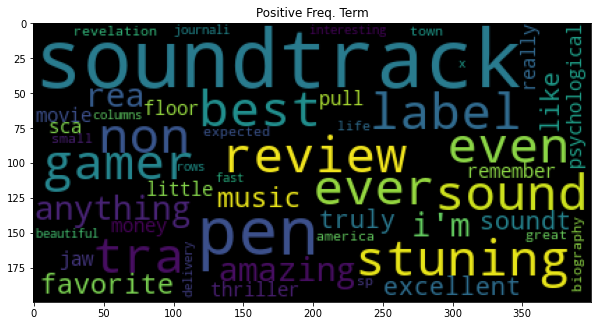

In [70]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt

pos_cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(pos) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(pos_cloud)
plt.title('Positive Freq. Term')

Text(0.5, 1.0, 'Negitive Freq. Term')

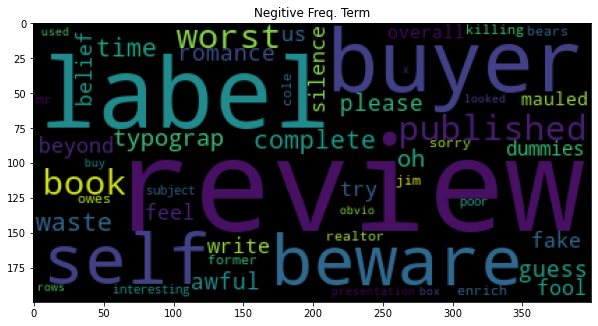

In [71]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt

neg_cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 50).generate(str(neg))
plt.figure(figsize=(10 , 10)) 
plt.imshow(neg_cloud)
plt.title('Negitive Freq. Term')

# Sentiment Analysis using a Predefined Python Library

In [73]:
# Pre Trained English Dictionary
# Lexican : Dictionary

from nltk.sentiment.vader   import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PRIME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
sent = SentimentIntensityAnalyzer()

In [76]:
sent.polarity_scores('thsi cold drink was good')

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [77]:
sent.polarity_scores('movie was horrible it was not worth watching')

{'neg': 0.463, 'neu': 0.537, 'pos': 0.0, 'compound': -0.6329}

In [83]:
score = sent.polarity_scores('earth is stupidly round')

In [79]:
# neg Negative (0 to 1) if value is towards 1 it means highly negative feeedback
# neu neutral (0 to 1) if value is towards 1 it means highly neutral feeedback
# pos Positive (0 to 1) if value is towards 1 it means highly positive feeedback
# neg Compund  (-1 to 1) sent.polarity_scores('movie was horrible it was not worth watching')
# if Compound is close to -1  it implies negative comment and if it implies +1 high positive feedback

In [84]:
score.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [85]:
score['compound']

-0.4588

In [87]:
score['pos']

0.0

In [89]:
score['neg']

0.5

# Lets run the Vader on the Amazon Dataset as a whole 

In [92]:
am_sent = pd.read_csv('amazonreviews.tsv', sep = '\t')

# consider you do not have a Labels column and you want to know wheter its a positive or negative comment

In [98]:
am_sent.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [97]:
am_sent.iloc[1,1]

"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

In [100]:
sent.polarity_scores(am_sent.iloc[1,1])

{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'compound': 0.8957}

In [101]:
am_sent.shape

(10000, 2)

In [105]:
empty_list = []
for i in range(am_sent.shape[0]):
    score = sent.polarity_scores(am_sent.iloc[i, 1])
    compound_score = score['compound']
    neg_score = score['neg']
    pos_score = score['pos']
    empty_list.append(compound_score)
        

In [107]:
# empty_list

[0.9454,
 0.8957,
 0.9858,
 0.9814,
 0.9781,
 0.99,
 -0.8744,
 0.99,
 0.8353,
 0.8196,
 -0.9274,
 0.9538,
 0.985,
 0.9097,
 -0.9312,
 -0.5414,
 0.9454,
 0.5182,
 0.7787,
 0.4926,
 0.6318,
 0.9517,
 0.9667,
 0.9815,
 0.8979,
 -0.7845,
 -0.0857,
 -0.5017,
 0.6486,
 0.9176,
 -0.7433,
 0.9015,
 -0.8345,
 0.9896,
 0.4434,
 0.8513,
 0.8219,
 0.9824,
 0.5951,
 0.0892,
 0.6177,
 0.7948,
 0.8402,
 -0.1027,
 0.4019,
 0.7717,
 -0.8688,
 0.9025,
 -0.8405,
 -0.6226,
 0.8979,
 0.8288,
 -0.8844,
 0.9884,
 -0.3239,
 -0.378,
 0.5984,
 -0.0731,
 0.7506,
 -0.6858,
 0.3695,
 -0.1327,
 -0.9005,
 -0.3612,
 0.2023,
 -0.6369,
 0.9854,
 0.9819,
 0.9558,
 0.9852,
 0.3948,
 -0.9806,
 0.5244,
 0.9427,
 0.8125,
 -0.4101,
 0.6586,
 0.9042,
 -0.8118,
 -0.0752,
 0.5927,
 0.9823,
 0.6705,
 0.7783,
 0.6369,
 0.9775,
 -0.6486,
 0.6808,
 -0.6391,
 0.4357,
 0.5457,
 0.7312,
 0.9499,
 -0.8176,
 0.9566,
 -0.0231,
 0.9273,
 -0.3182,
 0.8268,
 0.0,
 0.765,
 0.9909,
 0.9305,
 -0.9571,
 -0.802,
 -0.6697,
 0.9653,
 -0.7862,
 -0.

In [108]:
am['Comp_Score'] = empty_list

In [109]:
am.head()

,label,review,Comp_Score
0,1,stuning even for the non-gamer: this sound tra...,0.9454
1,1,the best soundtrack ever to anything.: i'm rea...,0.8957
2,1,amazing!: this soundtrack is my favorite music...,0.9858
3,1,excellent soundtrack: i truly like this soundt...,0.9814
4,1,"remember, pull your jaw off the floor after he...",0.9781


In [111]:
am.describe()

,label,Comp_Score
count,10000.000000,10000.000000
mean,0.490300,0.335207
std,0.499931,0.676143
min,0.000000,-0.994500
25%,0.000000,-0.299000
50%,0.000000,0.669600
75%,1.000000,0.914425
max,1.000000,0.998700


In [119]:
# Display the percentiles for the compound
am.Comp_Score.describe(percentiles=[.1, .2,  .3, .4, .5, .6, .7, .8, .9, 1])

count    10000.000000
mean         0.335207
std          0.676143
min         -0.994500
10%         -0.789750
20%         -0.497140
30%         -0.051600
40%          0.401900
50%          0.669600
60%          0.817600
70%          0.891000
80%          0.935100
90%          0.964800
100%         0.998700
max          0.998700
Name: Comp_Score, dtype: float64

In [117]:
am[am.Comp_Score > 0].shape # Positive Comments

(6795, 3)

In [118]:
am[am.Comp_Score < 0].shape

(3064, 3)

<h3>Conclusion : </h3><br>
We have implemented Vader to display percentage of Comments which were fall under certain range of positivity requirement.